In [4]:
import pandas as pd
import numpy as np
import matplotlib as mpl

from matplotlib import pyplot as plt

In [6]:
original_df = pd.read_csv("./original-coefficients-distribution.csv")
original_df.head()

,id,value
0,0,370
1,0,427
2,0,391
3,0,443
4,0,455


In [7]:
transcoded_df = pd.read_csv("transcoded-coefficients-distribution.csv")
transcoded_df.head()

,id,value
0,0,370
1,0,427
2,0,391
3,0,443
4,0,455


In [11]:
def get_values(df, id, blocks_count):
    result = df[df.id == id].value.to_numpy()
    if len(result) < blocks_count:
        result = np.concatenate((result, np.zeros(blocks_count - len(result))))
    return np.sort(result)

In [35]:
plt.style.use("default")

# LaTeX font
mpl.rcParams["text.usetex"] = True
mpl.rcParams["font.family"] = "serif"
mpl.rcParams["font.serif"] = "cm"
mpl.rcParams["font.size"] = 12

In [14]:
# !sudo apt install cm-super dvipng texlive-latex-extra texlive-latex-recommended

Password:
sudo: a password is required


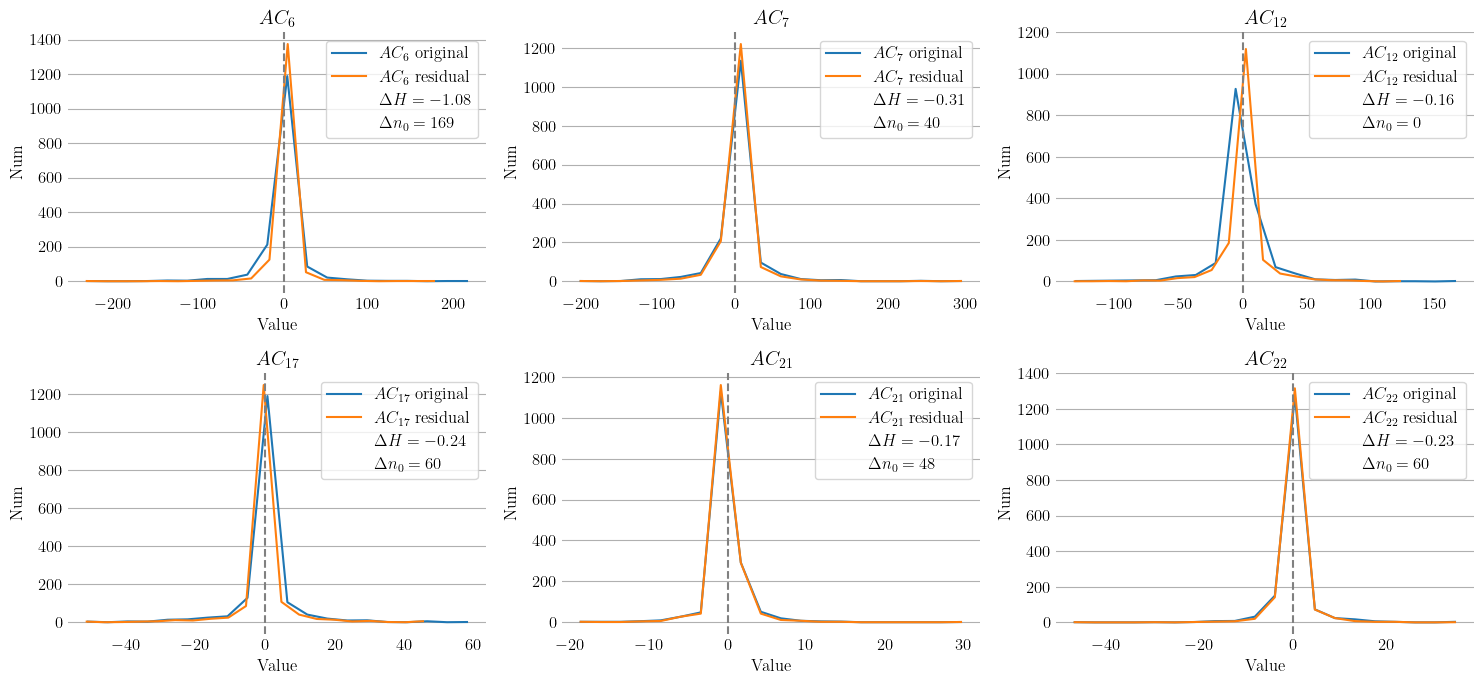

In [37]:
def plot_distribution(ax, df, id, label):
    values = get_values(df, id, blocks_count=1600)

    _, counts = np.unique(values, return_counts=True)
    ps = counts / counts.sum()
    entropy = -np.sum(ps * np.log2(ps))

    hist, bins = np.histogram(values, bins=20)
    bin_centers = (bins[1:] + bins[:-1]) / 2

    ax.plot(bin_centers, hist, label=label)

    return hist.max(), entropy, np.count_nonzero(values == 0)


def get_title(id):
    return "DC" if id == 0 else f"$AC_{{{id}}}$"


def compare_distribution(ax, id):
    title = get_title(id)

    m1, e1, n1 = plot_distribution(ax, original_df, id, f"{title} original")
    m2, e2, n2 = plot_distribution(ax, transcoded_df, id, f"{title} residual")

    ax.plot([], [], " ", label=f"$\\Delta H={round(e2 - e1, 2)}$")
    ax.plot([], [], " ", label=f"$\\Delta n_0={n2 - n1}$")

    ax.axvline(x=0, color="gray", linestyle="--")

    ax.grid(axis="y")
    ax.tick_params(axis="both", length=0)
    yticks = np.arange(0, max(m1, m2) + 100, 100)
    if len(yticks) > 10:
        yticks = yticks[::2]
    ax.set_yticks(yticks)

    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)
    ax.spines["bottom"].set_visible(False)
    ax.spines["left"].set_visible(False)

    ax.set_title(title, fontweight="bold")
    ax.set_xlabel("Value")
    ax.set_ylabel("Num")
    ax.legend()  # frameon=False)


def compare_distributions(ids):
    n = len(ids)
    _, axes = plt.subplots(nrows=2, ncols=(n + 1) // 2, figsize=(15, 7))

    for ax, id in zip(axes.flat, ids):
        compare_distribution(ax, id)

    plt.tight_layout()
    plt.savefig("coefficients_distribution.png", dpi=300)
    plt.show()


compare_distributions([6, 7, 12, 17, 21, 22])